In [16]:
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
    bdfname = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/binned_data/win-50.0_dtovr-25.0_cg-Good-MUA_seg-0-0/20170322T165429Z-50.0-25.0.binned'

In [33]:
thresh = 4.0
threshs = np.linspace(0, 25, 40)
with h5.File(bdfname) as bdf:
    stims = bdf.keys()
    totalcgs_save = np.zeros((len(threshs), len(stims)))
    # For each stim, get the population tensor and threshold
    for t, thresh in enumerate(threshs):
        for s, stim in enumerate(stims):
            stimpoptens = np.array(bdf[stim]['pop_tens'])
            #poptens is cells x wins x trials.  Sum over second axis
            (ncells, nwins, ntrials) = np.shape(stimpoptens)
            avgFR = np.sum(stimpoptens, 1) / nwins
            avgFRtens = np.tile(avgFR[:, np.newaxis, :], (1, nwins, 1))
            threshtens = thresh*avgFRtens
            binmat = 1*(np.greater(stimpoptens, threshtens))
            totalcgs = np.sum(binmat)
            totalcgs_save[t, s] = totalcgs
            

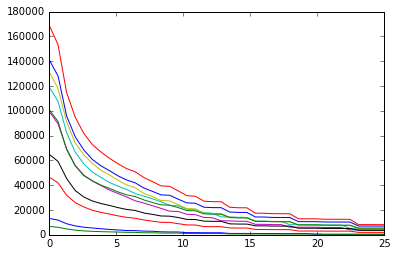

In [34]:
plt.plot(threshs, totalcgs_save)

Looks like a threshold greater than seven is good